In [1]:
#!/usr/bin/env python3.8
# coding: utf-8

# This is python code written for use with PlantCV version 3.14.0
# This will find 3 possible plants from images taken using the RGB imaging
# platform in the Hirsch Lab at the University of Minnesota
# The script will output morphological and color traits fore each plant
# along with 3 images showing the masks of each plant found

# Cory D. Hirsch and Kevin Propst
# February 20, 2021 - orginal
# March 9, 2021 - fixes to left plant mask
# March 18, 2021 - fixes to left and middle plant mask
# March 24, 2021 - changes to pipeline to work with images from Hirsch lab imaging station -> change y values, roi, and cutting apart input file names
# June  07, 2022 - Fixed the ROI and the pipelines ability to analyze physical traits. need to use opencv 4.5.1.48 for this to work 

# Import Libraries
import argparse
import os
import sys
import cv2
import numpy as np
from matplotlib import pyplot as plt
from plantcv import plantcv as pcv
from plantcv.plantcv import params 

 

In [2]:
# Set global debug behavior to None (default), "print" (to file), or "plot" (Jupyter Notebooks or X11)
# this makes lots of intermediate image files print out so you can see all the steps along the way
# comment out when not debugging
# will see this throughout as it was used in jupyter notebook for debugging and needed to be in each code cell
pcv.params.debug = "plot"

# #Define functions
# def options():
#     parser = argparse.ArgumentParser(description="Imaging processing with PlantCV.")
#     parser.add_argument("-d", "--image", help="Input image file.", required=True)
#     parser.add_argument("-r","--result", help="Result file.", required=False)
#     parser.add_argument("-p", "--pdfs", help="Naive Bayes PDF file.", required=True)
#     parser.add_argument("-o", "--outdir", help="Output directory for image files.", required=False)
#     parser.add_argument("-w","--writeimg", help="Write out images.", default=False, action="store_true")
#     parser.add_argument("-D", "--debug", help="Turn on debug, prints intermediate images.", action=None)
#     args = parser.parse_args()
#     return args

In [3]:
###
#Uncomment this section if testing with individual image hardcoded in
class options:
     def __init__(self):
        #self.image = "/Users/chirsch/Documents/projects/Maize/phenotyping/plantCV/cold_stress/{Plot_3816}{Experiment_107}{Genotype_B73}{Treatment_Control}{Day_10}.tiff"
        self.image= "/Users/propst/Desktop/project_folder/heat_stress/H8_folder/h8_nef/{Plot_100}{Experiment_H8}{Planted_05-13-2022}{SeedSource_SP21_20430}{SeedYear_21}{Genotype_OH43}{Treatment_control}{PictureDay_13}.tiff"
        self.debug = "print"
        self.writeimg = False
        self.result = "/Users/propst/Documents/output/results.txt"
        self.outdir = "/Users/propst/Documents/output"

args = options()
pcv.params.outdir = args.outdir
pcv.params.debug = args.debug
####

In [4]:
#def main():
#     args = options()
#     os.chdir(args.outdir)

# Read Image
# Read RGB image
img, path, filename = pcv.readimage(filename="/Users/propst/Desktop/project_folder/heat_stress/H8_folder/h8_nef/{Plot_100}{Experiment_H8}{Planted_05-13-2022}{SeedSource_SP21_20430}{SeedYear_21}{Genotype_OH43}{Treatment_control}{PictureDay_13}.tiff")

# Print what file pipeline is currently working on
print(filename)
print()

####
# Get Metadata from file name for information about image taken
# Get genotype
geno_name = filename.split("}{")
print(geno_name)
print()
geno_name = geno_name[5]
geno_name = geno_name.split("_")
geno_name = geno_name[1]
print(geno_name)

    # Get day
day = filename.split("}{")
day = day[7]
day = day.split("_")
day= day[1]
day = day.split("}")
day = day[0]
print(day)

    # Get plot
plot = filename.split("}{")
plot = plot[0]
plot = plot.split("_")
plot = plot[1]
print(plot)

    # Get experiment number
exp_name = filename.split("}{")
exp_name = exp_name[1]
exp_name = exp_name.split("_")
exp_name = exp_name[1]
print(exp_name)

    # Get treatment conditions
treat_name = filename.split("}{")
treat_name = treat_name[6]
treat_name = treat_name.split("_")
treat_name = treat_name[1]
print(treat_name)

{Plot_100}{Experiment_H8}{Planted_05-13-2022}{SeedSource_SP21_20430}{SeedYear_21}{Genotype_OH43}{Treatment_control}{PictureDay_13}.tiff

['{Plot_100', 'Experiment_H8', 'Planted_05-13-2022', 'SeedSource_SP21_20430', 'SeedYear_21', 'Genotype_OH43', 'Treatment_control', 'PictureDay_13}.tiff']

OH43
13
100
H8
control


In [5]:
# Create masks using Naive Bayes Classifier and PDFS file
# pcv.params.debug = "plot"

# masks = pcv.naive_bayes_classifier(img,"/Users/propst/new_pdfs.txt")
masks = pcv.naive_bayes_classifier(img,"/Users/propst/Desktop/project_folder/pdfs.txt")

In [6]:
# Create masks using Naive Bayes Classifier and PDFS file
#pcv.params.debug = "plot"
# masks = pcv.naive_bayes_classifier(img,"/Users/propst/Desktop/project_folder/pdfs.txt")
# The following code will identify the racks in the image, find the top edge, and choose a line along the edge to pick a y coordinate to trim any soil/pot pixels identified as plant material.
    # Convert RGB to HSV and extract the Value channel
    #pcv.params.debug = "plot"
v = pcv.rgb2gray_hsv(img, 'v')

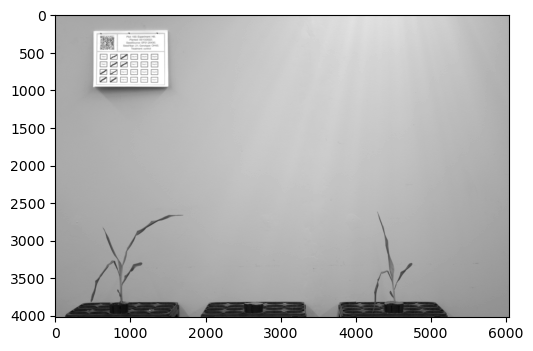

In [7]:
pcv.params.debug = "plot"
v = pcv.rgb2gray_hsv(img, 'v')


# s_thresh_cv = pcv.threshold.binary(gray_img=s, threshold=85, max_value=255, object_type='light')


# s_thresh = pcv.threshold.binary(s, 90, 255, "light")
# v_thresh = pcv.threshold.binary(v, 90, 255, 'light')

# dilate_racks_v = pcv.dilate(v_thresh, 9, 1)
# dilate_racks_s = pcv.dilate(s_thresh, 9, 1)





In [8]:
# s_thresh_cv = pcv.threshold.binary(gray_img=s, threshold=85, max_value=255, object_type='light')
# print("s_thresh_cv")

# s_thresh = pcv.threshold.binary(s, 125, 255, "light")
# print("s_thresh")

# s_mblur = pcv.median_blur(gray_img=s_thresh, ksize=7)
# print("s_mblur")

# gaussian_img = pcv.gaussian_blur(img=s_thresh, ksize=(5, 5), sigma_x=0, sigma_y=None)
# print("gaussian")


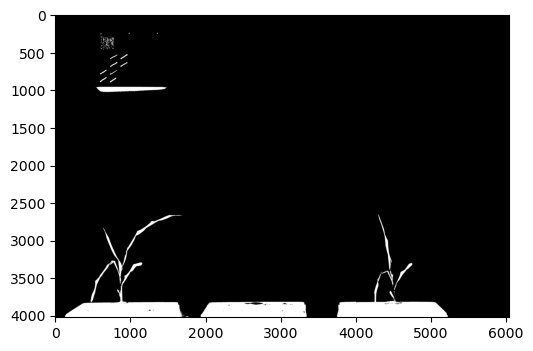

In [9]:
v_thresh = pcv.threshold.binary(v, 125, 255, 'dark')


# v_mblur = pcv.median_blur(gray_img=v_thresh, ksize=1)
# print("v_mblur")

# gaussian_img = pcv.gaussian_blur(img=v_thresh, ksize=(5, 3), sigma_x=1, sigma_y=1)
# print("gaussian")





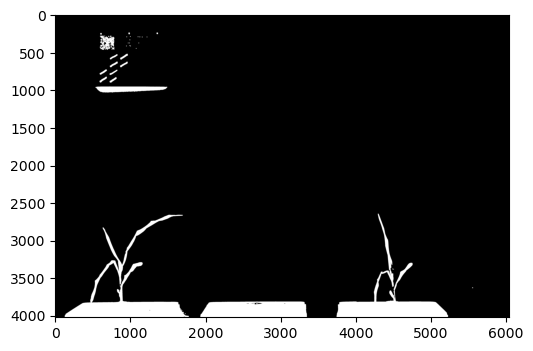

dilate_racks_v


In [10]:
dilate_racks_v = pcv.dilate(v_thresh, 9, 1)
print("dilate_racks_v")

In [11]:
# pcv.scharr_filter(s_thresh, 1, 0, scale =100)
# pcv.scharr_filter(s_thresh, 0, 1, scale =100)

# pcv.scharr_filter(v_thresh, 1, 0, scale =10)
# pcv.scharr_filter(v_thresh, 0, 1, scale =10)

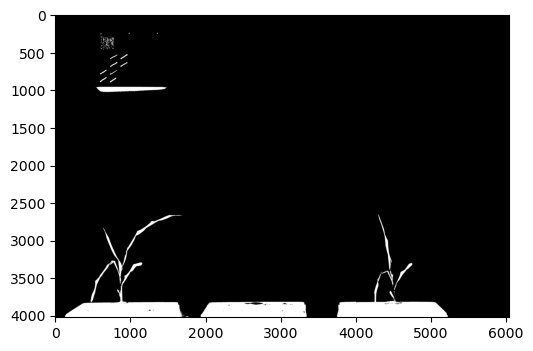

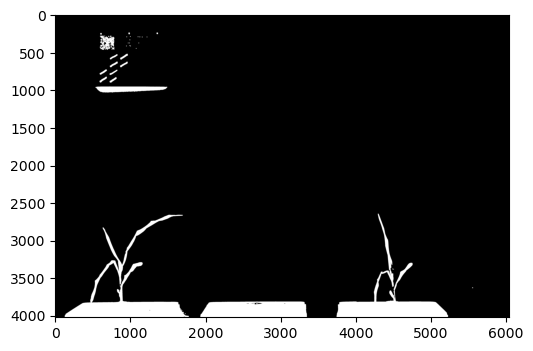

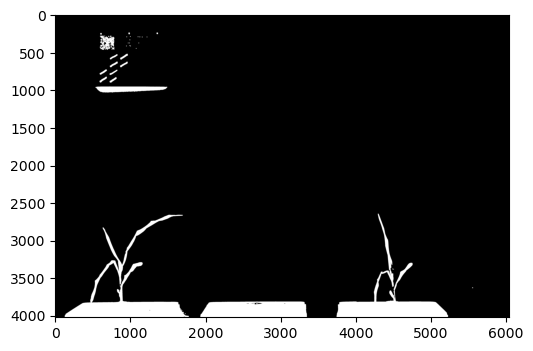

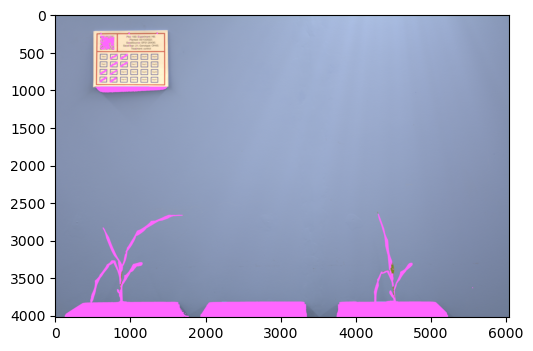

3820
3817
3814


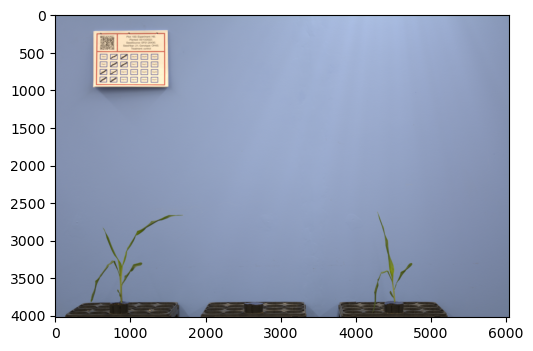

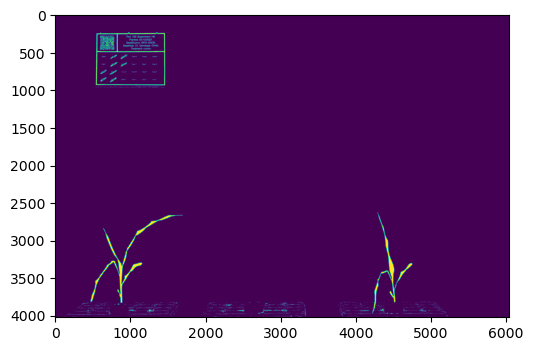

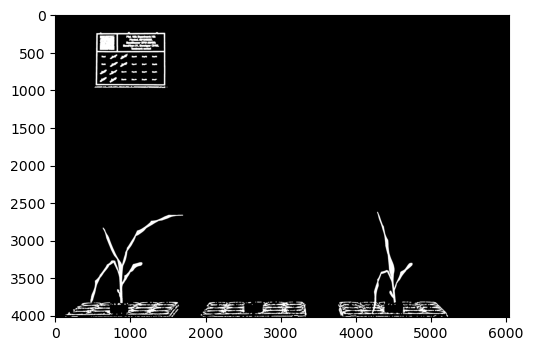

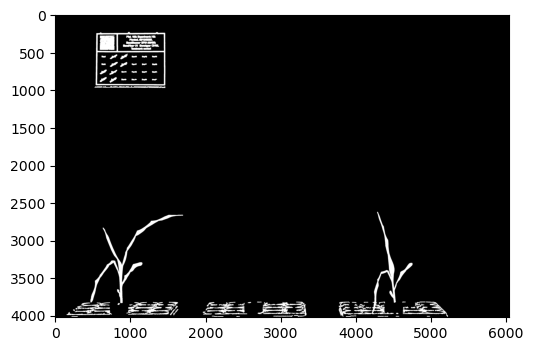

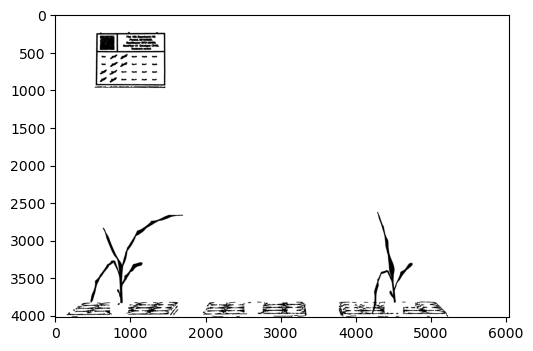

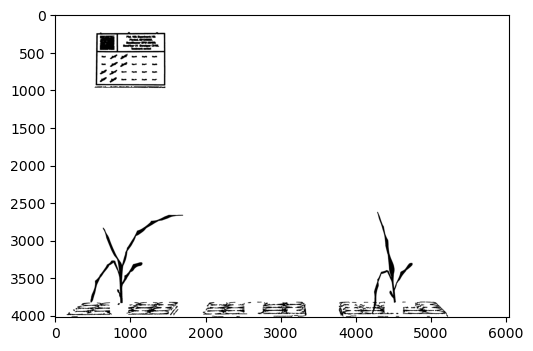

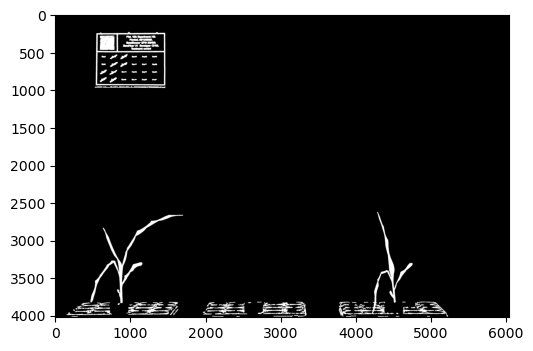

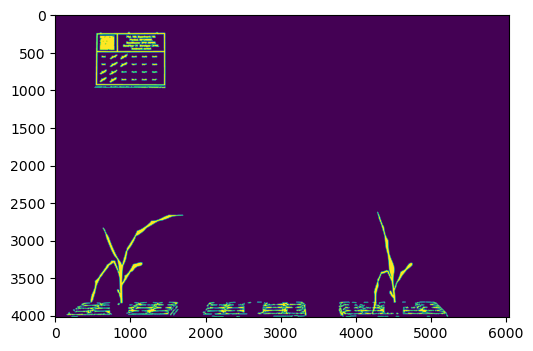

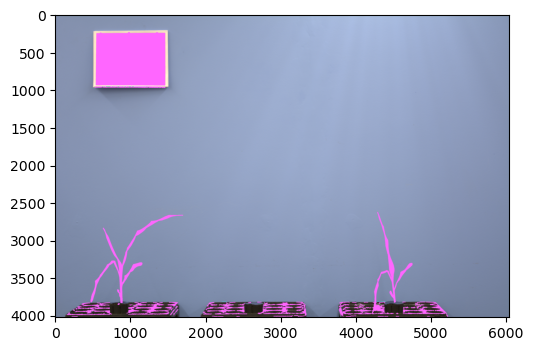

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


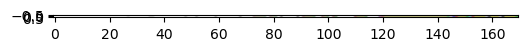

In [53]:
# Create masks using Naive Bayes Classifier and PDFS file
#pcv.params.debug = "plot"


  #pcv.params.debug = "plot"
v_thresh = pcv.threshold.binary(v, 125, 255, 'dark')

    # Dilate mask to fill holes.
    # June 07, altered dilate to (v_thresh, 9,1) from (v_thresh, 2,1) 

#pcv.params.debug = "plot"
dilate_racks = pcv.dilate(v_thresh, 9, 1)
    # Dilate mask to fill holes
mask = np.copy(dilate_racks)

    # Fill in small objects
#pcv.params.debug = "plot"
fill_racks = pcv.fill(mask, 10)
cnt_str=pcv.find_objects(img=img, mask=fill_racks)
    # edge detection
edges = cv2.Canny(fill_racks,60,180)

    # write all the straight lines from edge detection
lines = cv2.HoughLinesP(edges,rho = 1,theta = 1*np.pi/180,threshold = 150,minLineLength = 50,maxLineGap = 15)
N = lines.shape[0]
for i in range(N):
    x1 = lines[i][0][0]
    y1 = lines[i][0][1]
    x2 = lines[i][0][2]
    y2 = lines[i][0][3]
    cv2.line(img,(x1,y1),(x2,y2),(255,0,0),2)

    # keep only horizontal lines
N = lines.shape[0]
tokeep = []
for i in range(N):
    want = (abs(lines[i][0][1]-lines[i][0][3]))<=10
    tokeep.append(want)

lines = lines[tokeep]

    # assign lines to positions around plants
N = lines.shape[0]
tokeep = []
left = []
mid = []
right = []


for i in range(N):
    leftones = lines[i][0][2]<=2000
    left.append(leftones)

    midones = 3000>lines[i][0][2]>2000
    mid.append(midones)

    rightones = lines[i][0][0]>=3300
    right.append(rightones)

right = lines[right]
    #print(right)
left = lines[left]
    #print(left)
mid = lines[mid]
    #print(mid)
    
# This section was detects automatically but might need to be changed if imaging station is moved, modified, or newly setup
    # This is used to draw the bottom horizontal boundry line to determine the bottom most portion of the plant.
    # If values aren't right you will either cut off the bottom of the plant or include too much of the pot/rack
    # Section was modified from the original Enders pipeline to work with Hirsch lab generated images

      # choose y values for right left mid adding some pixels to go about the pot (subtract because of orientation of axis)
#June 07 2022 altered the parameters for left, mid, and right plants after changeing light to dark since masking was more accurate. Determined working pics
#were between 3800-3850. Made if statements to ensure the outputs for plants were accurate if plant was missing from a tray.
y_left = left[0][0][3]
if y_left < 3000:
    y_left = y_left +(3820 - y_left)
print(y_left)
y_mid = mid[0][0][3]
if y_mid < 3000:
    y_mid = y_left
    # y_mid=2620
print(y_mid)
y_right= right[0][0][3]
if y_right < 3000:
    y_right = y_left
print(y_right)
    ####
    
# reload original image to write new lines on
    # img, path, filename = pcv.readimage("/Volumes/NO NAME/hirsch_lab_images/15-Mar-2021/{Plot_29}{Experiment_H3}{Planted_03-05-2021}{SeedSource_SP18_20204}{SeedYear_18}{Genotype_B73}{Treatment_control}{PictureDay_10}.tiff")
img, path, filename = pcv.readimage("/Users/propst/Desktop/project_folder/heat_stress/H8_folder/h8_nef/{Plot_100}{Experiment_H8}{Planted_05-13-2022}{SeedSource_SP21_20430}{SeedYear_21}{Genotype_OH43}{Treatment_control}{PictureDay_13}.tiff")

#plt.imshow(img)

# write horizontal lines on image
cv2.line(img,(left[0][0][0],left[0][0][1]),(left[0][0][2],left[0][0][3]),(255,255,51),2)
cv2.line(img,(mid[0][0][0],mid[0][0][1]),(mid[0][0][2],mid[0][0][3]),(255,255,51),2)
tmp = cv2.line(img,(right[0][0][0],right[0][0][1]),(right[0][0][2],right[0][0][3]),(255,255,51),2)

#plt.imshow(tmp)
# Add the different plant masks together
#pcv.params.debug = "plot"
added = masks["healthy"] + masks["necrosis"] + masks["stem"]
plt.imshow(masks["healthy"])
plt.imshow(masks["necrosis"])
plt.imshow(masks["stem"])
plt.imshow(masks["background"])
plt.imshow(masks["rack"])
plt.imshow(added)

# Dilate mask to fill holes
#pcv.params.debug = "plot"
dilate_img = pcv.dilate(added, 9, 1)

# Fill in small objects
#pcv.params.debug = "plot"
mask = np.copy(dilate_img)
fill_img = pcv.fill(mask, 400)

ret, inverted = cv2.threshold(fill_img, 125, 255, cv2.THRESH_BINARY_INV)

# Dilate mask to fill holes of plant
#pcv.params.debug = "plot"
dilate_inv = pcv.dilate(inverted, 2, 1)


# Fill in small objects of plant
#pcv.params.debug = "plot"
mask2 = np.copy(dilate_inv)
fill_plant = pcv.fill(mask2, 20)

inverted_img = pcv.invert(fill_plant)
plt.imshow(inverted_img)

# Identify objects
#pcv.params.debug = "plot"
id_objects, obj_hierarchy = pcv.find_objects(img, inverted_img)



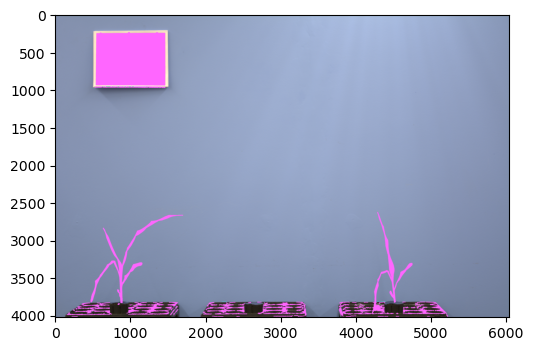

([array([[[2169, 4012]],
  
         [[2168, 4013]],
  
         [[2167, 4013]],
  
         [[2167, 4014]],
  
         [[2167, 4015]],
  
         [[2167, 4016]],
  
         [[2167, 4017]],
  
         [[2167, 4018]],
  
         [[2167, 4019]],
  
         [[2168, 4019]],
  
         [[2169, 4019]],
  
         [[2170, 4019]],
  
         [[2171, 4019]],
  
         [[2172, 4019]],
  
         [[2173, 4019]],
  
         [[2174, 4019]],
  
         [[2175, 4019]],
  
         [[2176, 4019]],
  
         [[2177, 4019]],
  
         [[2178, 4019]],
  
         [[2179, 4019]],
  
         [[2180, 4019]],
  
         [[2181, 4019]],
  
         [[2182, 4019]],
  
         [[2183, 4019]],
  
         [[2184, 4019]],
  
         [[2185, 4019]],
  
         [[2186, 4019]],
  
         [[2187, 4019]],
  
         [[2188, 4019]],
  
         [[2189, 4019]],
  
         [[2190, 4019]],
  
         [[2191, 4019]],
  
         [[2192, 4019]],
  
         [[2193, 4019]],
  
         [[2194, 401

In [55]:
# # This section was detects automatically but might need to be changed if imaging station is moved, modified, or newly setup
#     # This is used to draw the bottom horizontal boundry line to determine the bottom most portion of the plant.
#     # If values aren't right you will either cut off the bottom of the plant or include too much of the pot/rack
#     # Section was modified from the original Enders pipeline to work with Hirsch lab generated images

#     # choose y values for right left mid adding some pixels to go about the pot (subtract because of orientation of axis)
# y_left = left[0][0][3]
#     # y_left = 2580
# print(y_left)
# y_mid = mid[0][0][3]
#     # y_mid=2620
# print(y_mid)
# y_right= right[0][0][3]
# print(y_right)
#     ####
pcv.find_objects(img, inverted_img)

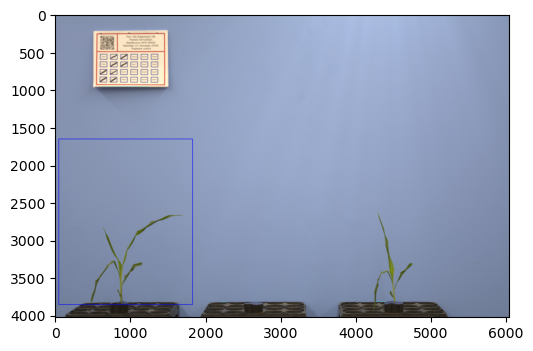

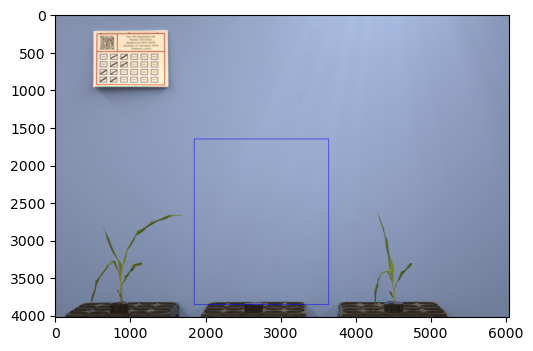

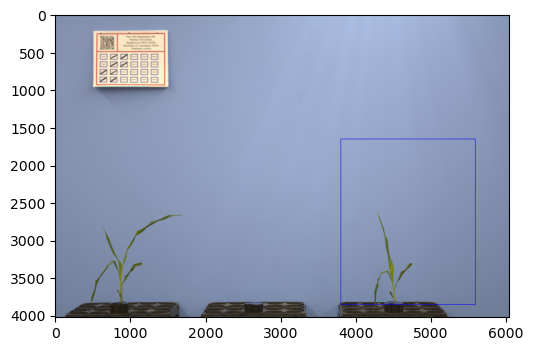

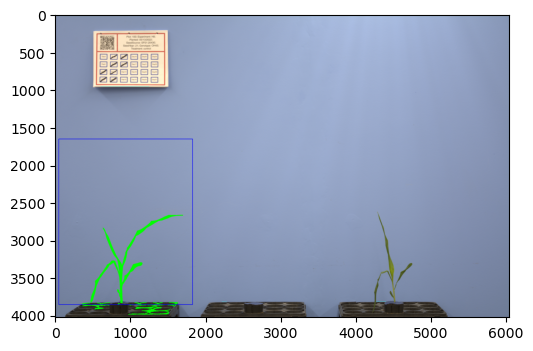

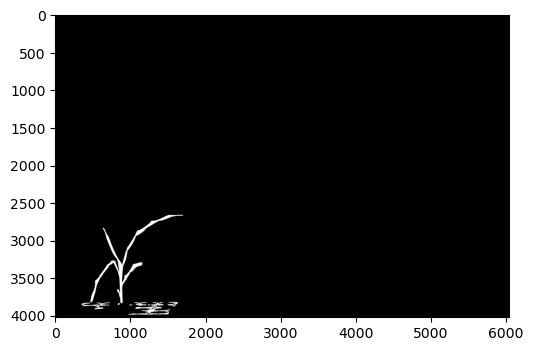

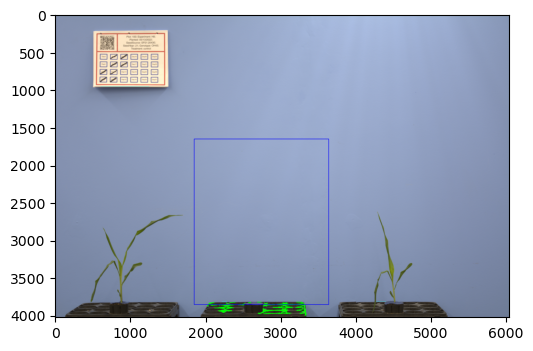

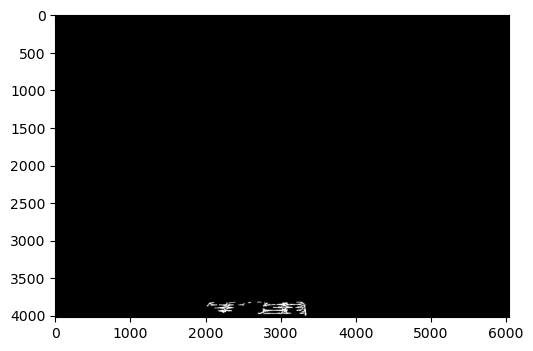

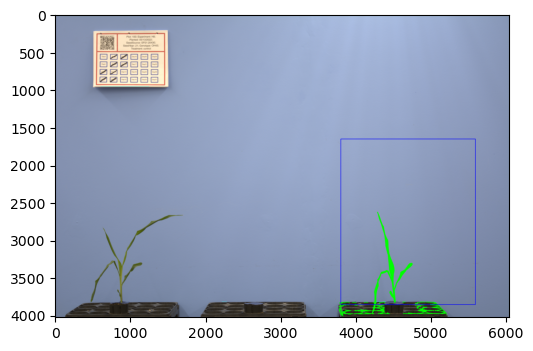

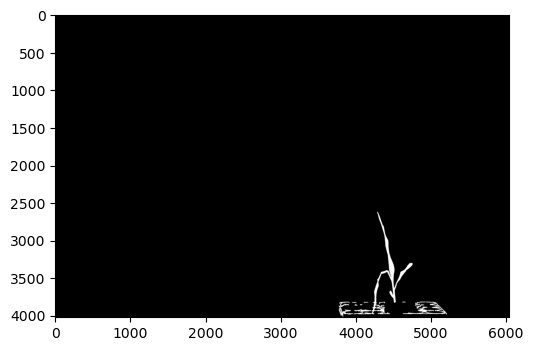

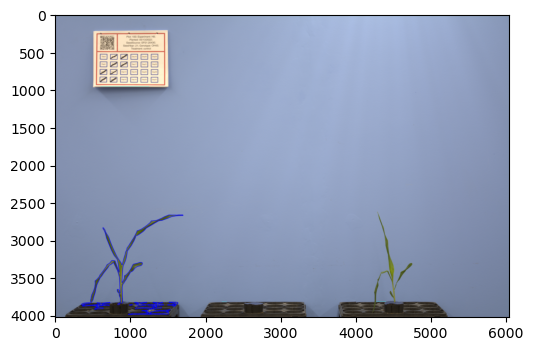

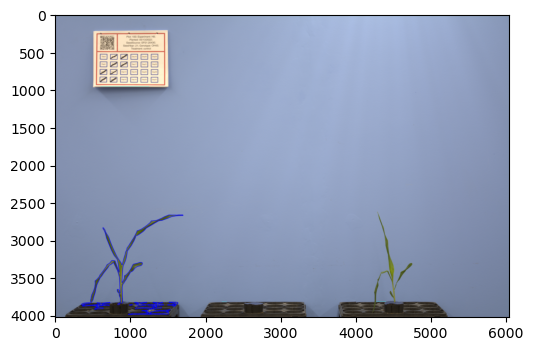

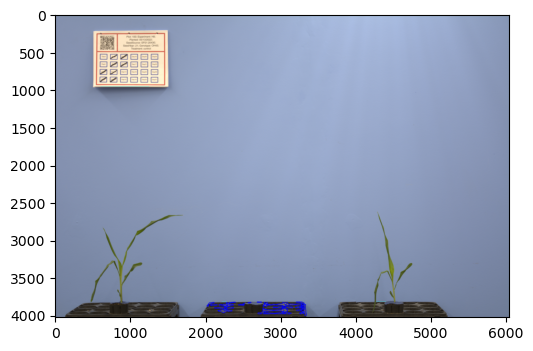

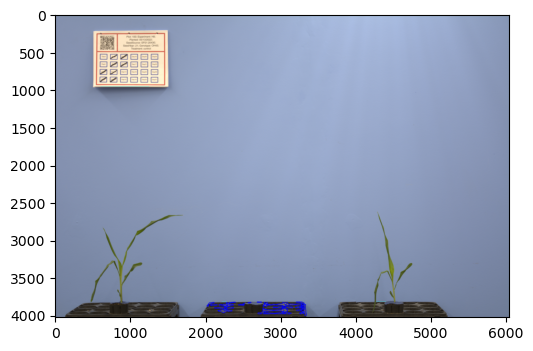

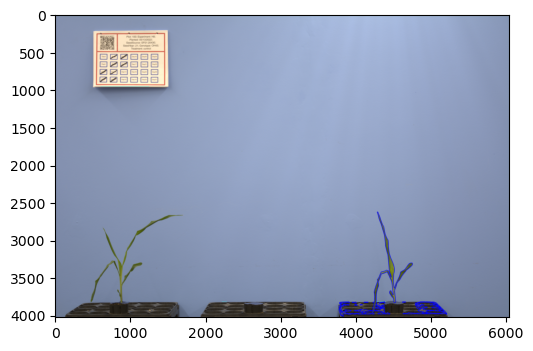

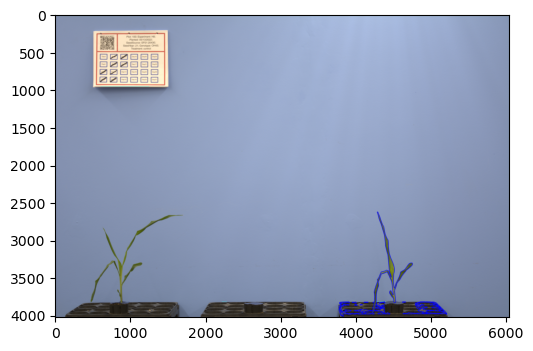

In [14]:
# Define ROIs
#pcv.params.debug = "plot"
roi_left, roi_hierarchy_left = pcv.roi.rectangle(img, 50, 1650, 2205, 1780)
roi_mid, roi_hierarchy_mid = pcv.roi.rectangle(img, 1850, 1650, 2205, 1790)
roi_right, roi_hierarchy_right = pcv.roi.rectangle(img, 3800, 1650, 2205, 1790)

# Decide which objects to keep
#pcv.params.debug = "plot"
roi_objects_left, roi_obj_hierarchy_left, kept_mask_left, obj_area_left = pcv.roi_objects(img,roi_left, roi_hierarchy_left,id_objects, obj_hierarchy,'partial')
roi_objects_mid, roi_obj_hierarchy_mid, kept_mask_mid, obj_area_mid = pcv.roi_objects(img,roi_mid, roi_hierarchy_mid,id_objects, obj_hierarchy,'partial')
roi_objects_right, roi_obj_hierarchy_right, kept_mask_right, obj_area_right = pcv.roi_objects(img, roi_right, roi_hierarchy_right,id_objects, obj_hierarchy,'partial')

# Combine objects
# This was the reason invalid contours caused by missing plants would error out of runs. I changed the if statement to look if the length of the array is greater than 0
#it would perform ROI and hierarchy measurements. if length of array is 0 that means no plant is present and is skipped meaning no error occurs
#pcv.params.debug = "plot"
if len(roi_objects_left) > 0:   
    obj_l, mask_l = pcv.object_composition(img, roi_objects_left, roi_obj_hierarchy_left)
else:
    obj_l = None
        
if len(roi_objects_mid) > 0:
    obj_m, mask_m = pcv.object_composition(img, roi_objects_mid, roi_obj_hierarchy_mid)
else:
    obj_m = None
    
if len(roi_objects_right) > 0:   
    obj_r, mask_r = pcv.object_composition(img, roi_objects_right, roi_obj_hierarchy_right)
else:
    obj_r = None

4020
6036
3
4020
6036
3
4020
6036
3


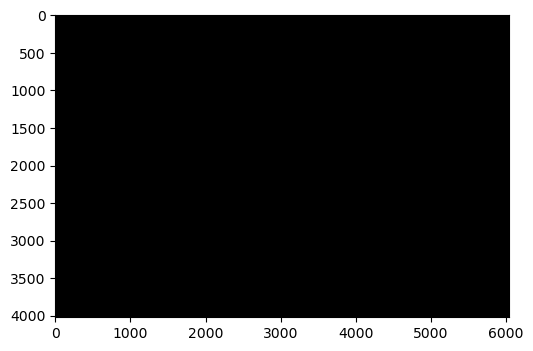

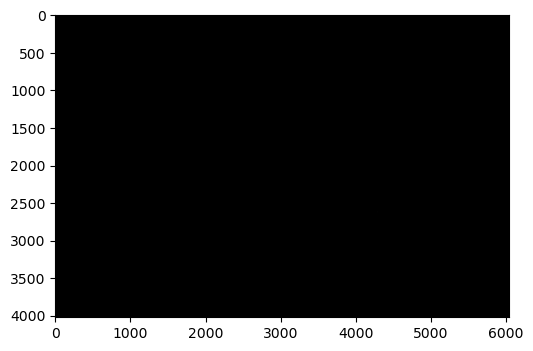

RuntimeError: Images must both be single-channel/grayscale/binary or RGB

In [100]:
def analyze_bound_horizontal2(img, obj, mask, line_position, filename=False):
    ori_img = np.copy(img)
# print(ori_img)

# Draw line horizontal line through bottom of image, that is adjusted to user input height
    if len(np.shape(ori_img)) == 3:
        iy,ix,iz = np.shape(ori_img)
        print(iy)
        print(ix)
        print(iz)
    else:
        iy, ix = np.shape(ori_img)
    size = (iy, ix)
    size1 =(iy, ix, 3)
    background = np.zeros(size, dtype=np.uint8)
    wback = np.zeros(size1, dtype=np.uint8)
    x_coor = ix
    y_coor = (iy) - (line_position)
    rec_corner = (iy - 2)
    rec_point1 = (1, rec_corner)
    rec_point2 = (x_coor - 2, y_coor - 2)
    cv2.rectangle(background, rec_point1, rec_point2, (255), 1)
    below_contour, below_hierarchy = cv2.findContours(background, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)[-2:]

#     print(size)
#     print(size1)
#     print(below_contour)
#     print(below_hierarchy)
#     print(wback)

    below = []
    above = []
    mask_nonzerox, mask_nonzeroy = np.nonzero(mask)
    obj_points = np.vstack((mask_nonzeroy, mask_nonzerox))
    obj_points1 = np.transpose(obj_points)


    for i, c in enumerate(obj_points1):
        xy = tuple(c)
       
        pptest = cv2.pointPolygonTest(below_contour[0], xy , measureDist=False)
        if pptest == 1:
            below.append(xy)
            cv2.circle(ori_img, xy, 1, (0, 0, 255))
            cv2.circle(wback, xy, 1, (0, 0, 0))
        else:
            above.append(xy)
            cv2.circle(ori_img, xy, 1, (0, 255, 0))
            cv2.circle(wback, xy, 1, (255, 255, 255))

            return wback
ori_img = np.copy(img)
np.shape(ori_img)

# Draw line horizontal line through bottom of image, that is adjusted to user input height
# pcv.params.debug = "plot"

# June 07 2022, altered the code here so that if wback and obj were not defined by the contours that means there is no plant and is skipped instead of
# giving an error code. made sure to add an else and next statement to each if statement so pipeline would continue without presence of all plants.

if obj_r is not None:
    wback_r = analyze_bound_horizontal2(img, obj_r, mask_r, iy-y_right)
    wback_r
else:
    obj_r = 0
    next
if obj_m is not None:
    wback_m = analyze_bound_horizontal2(img, obj_m, mask_m, iy-y_mid)
else:
    next
if obj_l is not None:
    wback_l = analyze_bound_horizontal2(img, obj_l, mask_l, y_left)
else:
    next

#might consider trying thise on 'dark'
threshold_light = pcv.threshold.binary(img, 1, 1, 'dark')

if obj_r is not None:
    fgmask_r = pcv.background_subtraction(wback_r, threshold_light)
else:
    next
# if obj_m is not None:
#     fgmask_m = pcv.background_subtraction(wback_m, threshold_light)
# else:
#     next
if obj_l is not None:
    fgmask_l = pcv.background_subtraction(wback_l, threshold_light)
else:
    next
    #plt.imshow(fgmask_l)

if obj_l is not None:
    id_objects_left, obj_hierarchy_left = pcv.find_objects(img, fgmask_l)
else:
    pass
# if obj_m is not None:
#     id_objects_mid, obj_hierarchy_mid = pcv.find_objects(img, fgmask_m)
# else:
#     pass
if obj_r is not None:
    id_objects_right, obj_hierarchy_right = pcv.find_objects(img, fgmask_r)
else:
    pass

# Combine objects
if obj_r is not None:
    obj_r2, mask_r2 = pcv.object_composition(img, id_objects_right, obj_hierarchy_right)
else:
    next
# if obj_m is not None:
#     obj_m2, mask_m2 = pcv.object_composition(img, id_objects_mid, obj_hierarchy_mid)
# else:
#     next
if obj_l is not None:
    obj_l2, mask_l2 = pcv.object_composition(img, id_objects_left, obj_hierarchy_left)
else:
    next
# if obj_m is not None:
#     fgmask_m = pcv.background_subtraction(wback_m, threshold_light)
# else:
#     pass
if obj_l is not None:
    fgmask_l = pcv.background_subtraction(wback_l, threshold_light)
else:
    next
    #plt.imshow(fgmask_l)

if obj_l is not None:
    id_objects_left, obj_hierarchy_left = pcv.find_objects(img, fgmask_l)
else:
    pass
# if obj_m is not None:
#     id_objects_mid, obj_hierarchy_mid = pcv.find_objects(img, fgmask_m)
#     pass
# else:
#     pass
if obj_r is not None:
    id_objects_right, obj_hierarchy_right = pcv.find_objects(img, fgmask_r)
else:
    pass

# Combine objects
if obj_r is not None:
    obj_r2, mask_r2 = pcv.object_composition(img, id_objects_right, obj_hierarchy_right)
else:
    obj_r2 = None
    next
# if obj_m is not None:
#     obj_m2, mask_m2 = pcv.object_composition(img, id_objects_mid, obj_hierarchy_mid)
# else:
#     obj_m2 = None
#     next
if obj_l is not None:
    obj_l2, mask_l2 = pcv.object_composition(img, id_objects_left, obj_hierarchy_left)
else:
    obj_l2 = None
    next
    
if obj_l is not None:
    if obj_l2 is not None:
     #shape_img_left = pcv.analyze_object(img, obj_l2, fgmask_l) - plantCV version 3.10 code
        shape_img_left = pcv.analyze_object(img, obj_l2, fgmask_l,label="left")
        shape_data_left = pcv.outputs.observations['left']
        shape_img_left
else:
    print("obj_l is Nonetype")
    next

iy-y_mid


In [99]:
wback_r = analyze_bound_horizontal2(img, obj_r, mask_r, iy-y_right)
wback_m = analyze_bound_horizontal2(img, obj_m, mask_m, iy-y_mid)
wback_l = analyze_bound_horizontal2(img, obj_l, mask_l, iy-y_left)
print(iy+y_mid)
print(iy-y_left)
print(y_right)

4020
6036
3
4020
6036
3
4020
6036
3
7837
200
3814


4020
6036
3
4020
6036
3
4020
6036
3


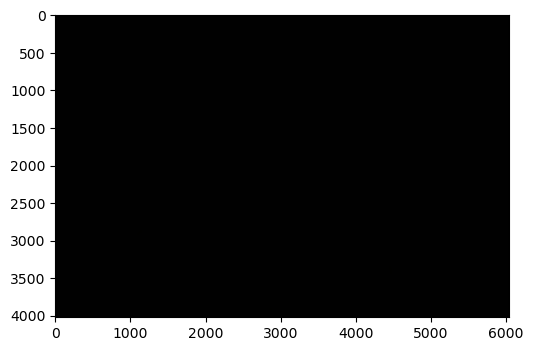

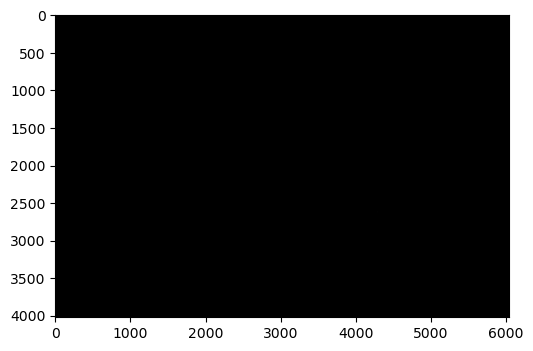

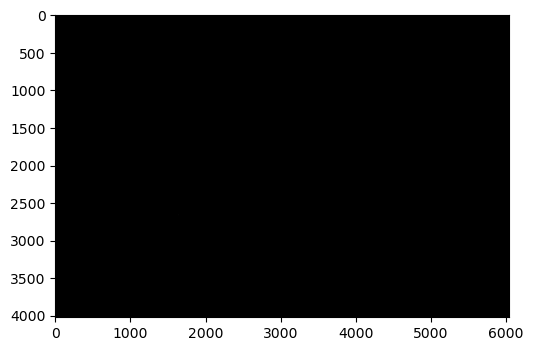

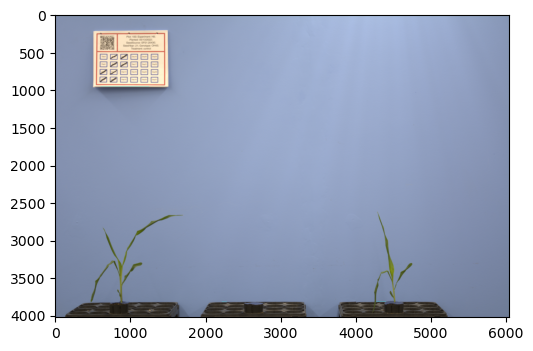

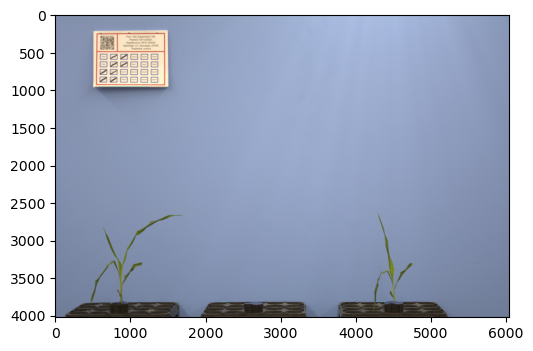

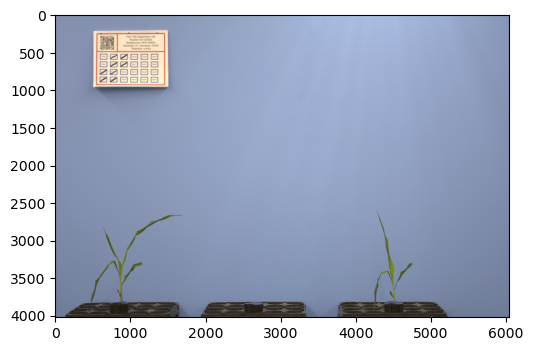

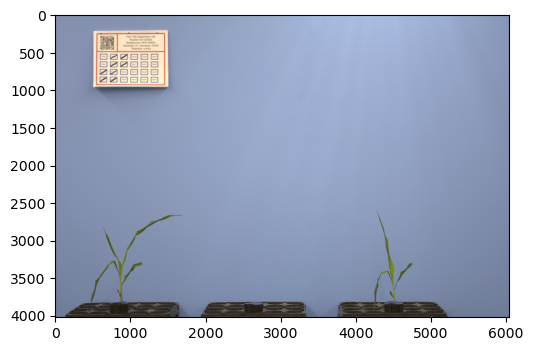

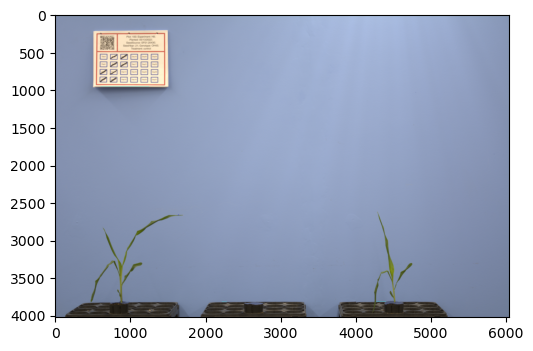

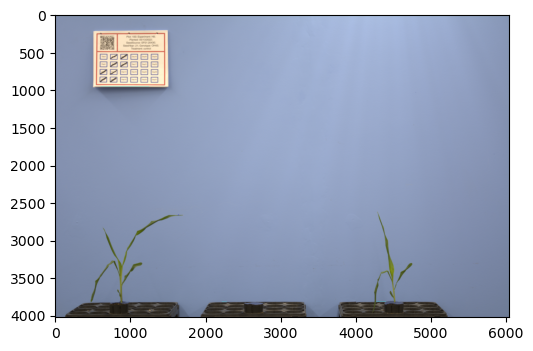

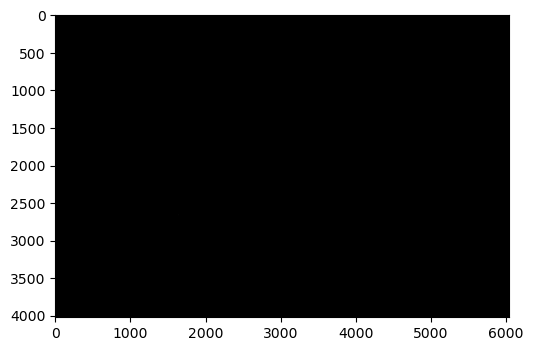

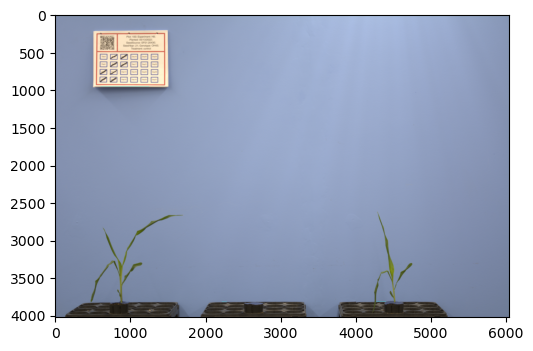

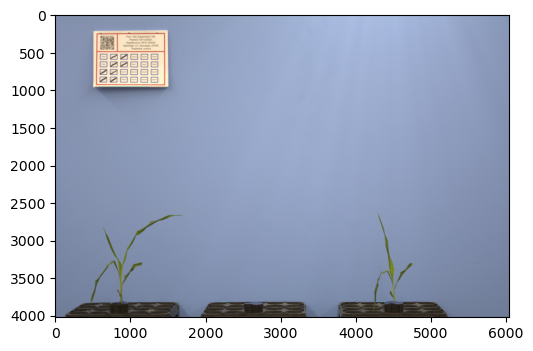

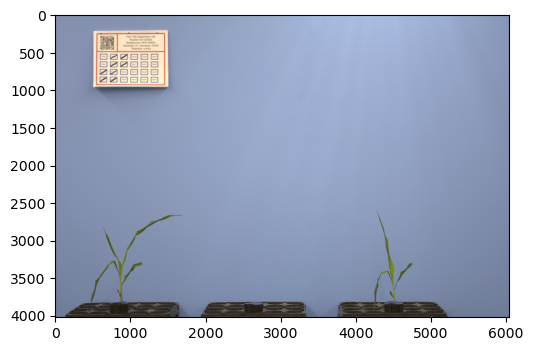

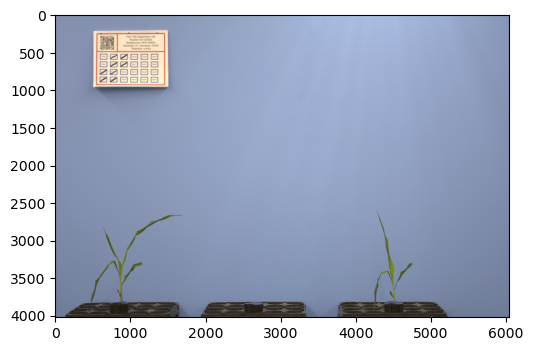

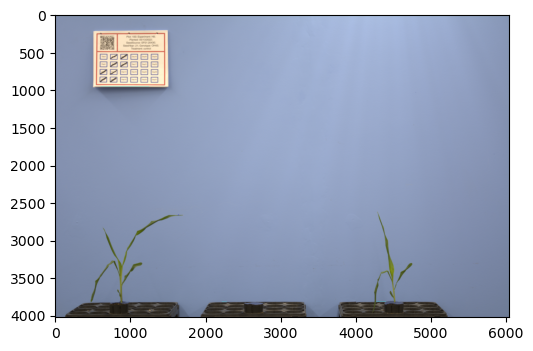

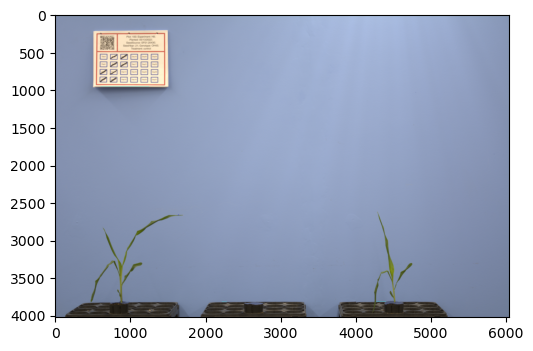

In [92]:
# Draw line horizontal line through bottom of image, that is adjusted to user input height
# pcv.params.debug = "plot"

# June 07 2022, altered the code here so that if wback and obj were not defined by the contours that means there is no plant and is skipped instead of
# giving an error code. made sure to add an else and next statement to each if statement so pipeline would continue without presence of all plants.

if obj_r is not None:
    wback_r = analyze_bound_horizontal2(img, obj_r, mask_r, iy-y_right)
    wback_r
else:
    obj_r = None
    pass
if obj_m is not None:
    wback_m = analyze_bound_horizontal2(img, obj_m, mask_m, iy-y_mid)
else:
    pass
if obj_l is not None:
    wback_l = analyze_bound_horizontal2(img, obj_l, mask_l, iy-y_left)
else:
    pass

#might consider trying thise on 'dark'
threshold_light = pcv.threshold.binary(img, 1, 1, 'light')

if obj_r is not None:
    fgmask_r = pcv.background_subtraction(wback_r, threshold_light)
else:
    next
# if obj_m is not None:
#     fgmask_m = pcv.background_subtraction(wback_m, threshold_light)
# else:
#     next
if obj_l is not None:
    fgmask_l = pcv.background_subtraction(wback_l, threshold_light)
else:
    next
    #plt.imshow(fgmask_l)

if obj_l is not None:
    id_objects_left, obj_hierarchy_left = pcv.find_objects(img, fgmask_l)
else:
    pass
# if obj_m is not None:
#     id_objects_mid, obj_hierarchy_mid = pcv.find_objects(img, fgmask_m)
# else:
#     pass
if obj_r is not None:
    id_objects_right, obj_hierarchy_right = pcv.find_objects(img, fgmask_r)
else:
    pass

# Combine objects
if obj_r is not None:
    obj_r2, mask_r2 = pcv.object_composition(img, id_objects_right, obj_hierarchy_right)
else:
    next
# if obj_m is not None:
#     obj_m2, mask_m2 = pcv.object_composition(img, id_objects_mid, obj_hierarchy_mid)
# else:
#     next
if obj_l is not None:
    obj_l2, mask_l2 = pcv.object_composition(img, id_objects_left, obj_hierarchy_left)
else:
    next
# if obj_m is not None:
#     fgmask_m = pcv.background_subtraction(wback_m, threshold_light)
# else:
#     pass
if obj_l is not None:
    fgmask_l = pcv.background_subtraction(wback_l, threshold_light)
else:
    next
    #plt.imshow(fgmask_l)

if obj_l is not None:
    id_objects_left, obj_hierarchy_left = pcv.find_objects(img, fgmask_l)
else:
    pass
# if obj_m is not None:
#     id_objects_mid, obj_hierarchy_mid = pcv.find_objects(img, fgmask_m)
#     pass
# else:
#     pass
if obj_r is not None:
    id_objects_right, obj_hierarchy_right = pcv.find_objects(img, fgmask_r)
else:
    pass

# Combine objects
if obj_r is not None:
    obj_r2, mask_r2 = pcv.object_composition(img, id_objects_right, obj_hierarchy_right)
else:
    obj_r2 = None
    next
# if obj_m is not None:
#     obj_m2, mask_m2 = pcv.object_composition(img, id_objects_mid, obj_hierarchy_mid)
# else:
#     obj_m2 = None
#     next
if obj_l is not None:
    obj_l2, mask_l2 = pcv.object_composition(img, id_objects_left, obj_hierarchy_left)
else:
    obj_l2 = None
    next
    
if obj_l is not None:
    if obj_l2 is not None:
     #shape_img_left = pcv.analyze_object(img, obj_l2, fgmask_l) - plantCV version 3.10 code
        shape_img_left = pcv.analyze_object(img, obj_l2, fgmask_l,label="left")
        shape_data_left = pcv.outputs.observations['left']
        shape_img_left
else:
    print("obj_l is Nonetype")
    next
    


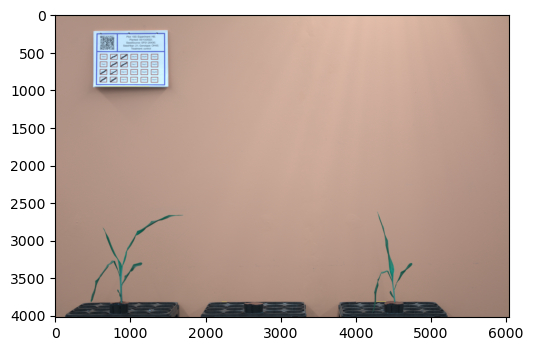

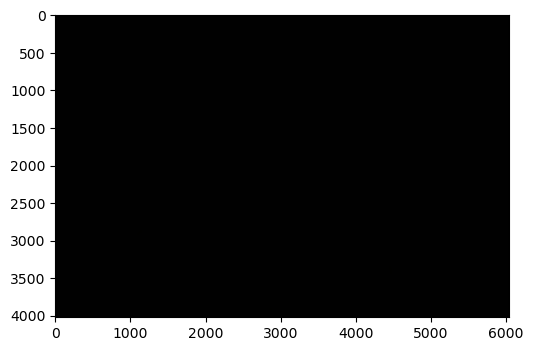

array([[[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       ...,

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]], dtype=uint8)

In [51]:
plt.imshow(img)
pcv.threshold.binary(ori_img, 1, 1, 'light')

In [22]:
#pcv.params.debug = "plot"
#If left plant present
#June 07 2022 have to add second if statement for obj_*2 because this variable is not defined and will error if plant is missing with an if- else statement 
if obj_l is not None:
    if obj_l2 is not None:
     #shape_img_left = pcv.analyze_object(img, obj_l2, fgmask_l) - plantCV version 3.10 code
        shape_img_left = pcv.analyze_object(img, obj_l2, fgmask_l, label="left")
        shape_data_left = pcv.outputs.observations['left']
else:
    print("obj_l is Nonetype")
    next

KeyError: 'default'

In [24]:
# If right plant present
if obj_r is not None:
    if obj_r2 is not None:
    #shape_img_right = pcv.analyze_object(img, obj_r2, fgmask_r) - plantCV version 3.10 code
        shape_img_right = pcv.analyze_object(img, obj_r2, fgmask_r, label=right)
        shape_data_right = pcv.outputs.observations['right']
        print("we good")
else:
    print("obj_r is Nonetype!")
    next

## morphological and color trait measurements
# Shape measurements
    # Shape data stored:
    # 'area'
    # 'convex_hull_area'
    # 'solidity'
    # 'perimeter'
    # 'width'
    # 'height'
    # 'longest_path'
    # 'center_of_mass'
    # 'convex_hull_vertices'
    # 'object_in_frame'
    # 'ellipse_center'
    # 'ellipse_major_axis'
    # 'ellipse_minor_axis'
    # 'ellipse_angle'
    # 'ellipse_eccentricity'

if obj_l is not None:
    if obj_l2 is not None:
     #shape_img_left = pcv.analyze_object(img, obj_l2, fgmask_l) - plantCV version 3.10 code
        shape_img_left = pcv.analyze_object(img, obj_l2, fgmask_l, label="left")
        shape_data_left = pcv.outputs.observations['left']
    else:
        print("obj_l is Nonetype")
        next
#print(shape_img_left)
    #print(shape_data_left['area']['value'])
    #print("area =",shape_data_left['area']['value'])
    # print("convex hull area =", shape_data_left['convex_hull_area']['value'])
    # print("solidity =", shape_data_left['solidity']['value'])
    # print("perimeter =", shape_data_left['perimeter']['value'])
    # print("width =", shape_data_left['width']['value'])
    #print("height =", shape_data_left['height']['value'])
    # print("longest_path =", shape_data_left['longest_path']['value'])
    # print("center_of_mass =", shape_data_left['center_of_mass']['value'])
    # print("convex_hull_vertices =", shape_data_left['convex_hull_vertices']['value'])
    # print("object_in_frame =", shape_data_left['object_in_frame']['value'])
    # print("ellipse_center =", shape_data_left['ellipse_center']['value'])
    # print("ellipse_major_axis =", shape_data_left['ellipse_major_axis']['value'])
    # print("ellipse_minor_axis =", shape_data_left['ellipse_minor_axis']['value'])
    # print("ellipse_angle =", shape_data_left['ellipse_angle']['value'])
    # print("ellipse_eccentricity =", shape_data_left['ellipse_eccentricity']['value'])

# If middle plant present

if obj_m is not None:
    if obj_m2 is not None:           
#     #shape_img_mid = pcv.analyze_object(img, obj_m2, fgmask_m) - plantCV version 3.10 code
        shape_img_mid = pcv.analyze_object(img, obj_m2, fgmask_m, label="mid")
        shape_data_mid = pcv.outputs.observations['mid']
    else:
        print("obj_m is None!")
        next

    #print("area =", shape_data_mid['area']['value'])
    # print("convex hull area =", shape_data_mid['convex_hull_area']['value'])
    # print("solidity =",shape_data_mid['solidity']['value'])
    # print("perimeter =",shape_data_mid['perimeter']['value'])
    # print("width=", shape_data_mid['width']['value'])
    # print("height =", shape_data_mid['height']['value'])
    # print("longest_path =", shape_data_mid['longest_path']['value'])
    # print("center_of_mass =", shape_data_mid['center_of_mass']['value'])
    # print("convex_hull_vertices =", shape_data_mid['convex_hull_vertices']['value'])
    # print("object_in_frame =", shape_data_mid['object_in_frame']['value'])
    # print("ellipse_center =", shape_data_mid['ellipse_center']['value'])
    # print("ellipse_major_axis =", shape_data_mid['ellipse_major_axis']['value'])
    # print("ellipse_minor_axis =", shape_data_mid['ellipse_minor_axis']['value'])
    # print("ellipse_angle =", shape_data_mid['ellipse_angle']['value'])
    # print("ellipse_eccentricity =", shape_data_mid['ellipse_eccentricity']['value'])



    # print("area =", shape_data_right['area']['value'])
    # print("convex hull area =", shape_data_right['convex_hull_area']['value'])
    # print("solidity=",shape_data_right['solidity']['value'])
    # print("perimeter=",shape_data_right['perimeter']['value'])
    # print("width=", shape_data_right['width']['value'])
    # print("height=", shape_data_right['height']['value'])
    # print("longest_path=", shape_data_right['longest_path']['value'])
    # print("center_of_mass=", shape_data_right['center_of_mass']['value'])
    # print("convex_hull_vertices=", shape_data_right['convex_hull_vertices']['value'])
    # print("object_in_frame=", shape_data_right['object_in_frame']['value'])
    # print("ellipse_center=", shape_data_right['ellipse_center']['value'])
    # print("ellipse_major_axis=", shape_data_right['ellipse_major_axis']['value'])
    # print("ellipse_minor_axis=", shape_data_right['ellipse_minor_axis']['value'])
    # print("ellipse_angle=", shape_data_right['ellipse_angle']['value'])
    # print("ellipse_eccentricity=", shape_data_right['ellipse_eccentricity']['value'])

KeyError: 'right'

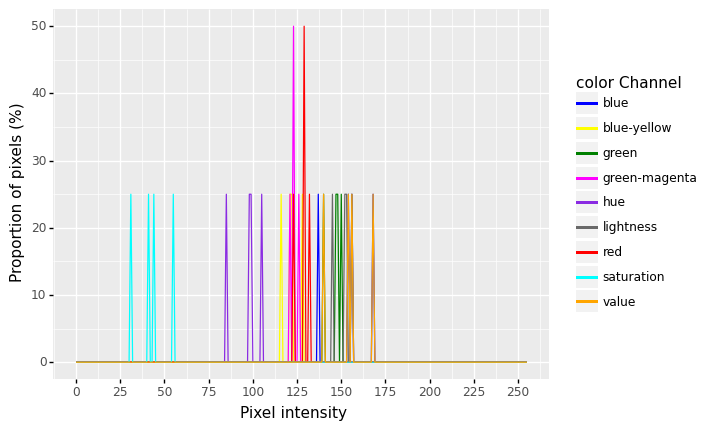

<ggplot: (8787759371870)>


NameError: name 'obj_m2' is not defined

In [23]:
# Color data
    # Color data stored:
    # 'blue_frequencies'
    # 'green_frequencies'
    # 'red_frequencies'
    # 'lightness_frequencies'
    # 'green-magenta_frequencies'
    # 'blue-yellow_frequencies'
    # 'hue_frequencies'
    # 'saturation_frequencies'
    # 'value_frequencies'
    # 'hue_circular_mean'
    # 'hue_circular_std'
    # 'hue_median'

#pcv.params.debug = "plot"
# If left plant present
# If left plant present
if obj_l is not None:
    if obj_l2 is not None:
    #All_color_data_left = pcv.analyze_color(rgb_img=img, mask=fgmask_l, hist_plot_type='all') - plantCV version 3.10 code
    #color_data_left = pcv.outputs.observations - plantCV version 3.10 code
        All_color_data_left = pcv.analyze_color(rgb_img=img, mask=fgmask_l, hist_plot_type='all', label="left")
        color_data_left = pcv.outputs.observations['left']
    # print("blue_frequencies=", color_data_left["blue_frequencies"]["value"])
    # print("green_frequencies=", color_data_left["green_frequencies"]["value"])
    # print("red_frequencies=", color_data_left["red_frequencies"]["value"])
    # print("lightness_frequencies=", color_data_left["lightness_frequencies"]["value"])
    # print("green-magenta_frequencies=", color_data_left["green-magenta_frequencies"]["value"])
    # print("blue-yellow_frequencies=", color_data_left["blue-yellow_frequencies"]["value"])
    # print("hue_frequencies=", color_data_left["hue_frequencies"]["value"])
    # print("saturation_frequencies=", color_data_left["saturation_frequencies"]["value"])
    # print("value_frequencies=", color_data_left["value_frequencies"]["value"])
    # print("hue_circular_mean=", color_data_left["hue_circular_mean"]["value"])
    # print("hue_circular_std=", color_data_left["hue_circular_std"]["value"])
    # print("hue_median=", color_data_left["hue_median"]["value"])

# If middle plant is present
if obj_m is not None:
    if obj_m2 is not None:
#All_color_data_mid = pcv.analyze_color(rgb_img=img, mask=fgmask_m, hist_plot_type='all') - plantCV version 3.10 code
#color_data_mid = pcv.outputs.observations - plantCV version 3.10 code
        All_color_data_mid = pcv.analyze_color(rgb_img=img, mask=fgmask_m, hist_plot_type='all', label="mid")
        color_data_mid = pcv.outputs.observations['mid']

    # print("blue_frequencies=", color_data_mid["blue_frequencies"]["value"])
    # print("green_frequencies=", color_data_mid["green_frequencies"]["value"])
    # print("red_frequencies=", color_data_mid["red_frequencies"]["value"])
    # print("lightness_frequencies=", color_data_mid["lightness_frequencies"]["value"])
    # print("green-magenta_frequencies=", color_data_mid["green-magenta_frequencies"]["value"])
    # print("blue-yellow_frequencies=", color_data_mid["blue-yellow_frequencies"]["value"])
    # print("hue_frequencies=", color_data_mid["hue_frequencies"]["value"])
    # print("saturation_frequencies=", color_data_mid["saturation_frequencies"]["value"])
    # print("value_frequencies=", color_data_mid["value_frequencies"]["value"])
    # print("hue_circular_mean=", color_data_mid["hue_circular_mean"]["value"])
    # print("hue_circular_std=", color_data_mid["hue_circular_std"]["value"])
    # print("hue_median=", color_data_mid["hue_median"]["value"])

# If right plant is present
if obj_r is not None:
    if obj_r2 is not None:    
    # All_color_data_right = pcv.analyze_color(rgb_img=img, mask=fgmask_r, hist_plot_type='all') - plantCV version 3.10 code
    # color_data_right = pcv.outputs.observations - plantCV version 3.10 code
        All_color_data_right = pcv.analyze_color(rgb_img=img, mask=fgmask_r, hist_plot_type='all', label="right")
        color_data_right = pcv.outputs.observations['right']

    # print("blue_frequencies=", color_data_right["blue_frequencies"]["value"])
    # print("green_frequencies=", color_data_right["green_frequencies"]["value"])
    # print("red_frequencies=", color_data_right["red_frequencies"]["value"])
    # print("lightness_frequencies=", color_data_right["lightness_frequencies"]["value"])
    # print("green-magenta_frequencies=", color_data_right["green-magenta_frequencies"]["value"])
    # print("blue-yellow_frequencies=", color_data_right["blue-yellow_frequencies"]["value"])
    # print("hue_frequencies=", color_data_right["hue_frequencies"]["value"])
    # print("saturation_frequencies=", color_data_right["saturation_frequencies"]["value"])
    # print("value_frequencies=", color_data_right["value_frequencies"]["value"])
    # print("hue_circular_mean=", color_data_right["hue_circular_mean"]["value"])
    # print("hue_circular_std=", color_data_right["hue_circular_std"]["value"])
    # print("hue_median=", color_data_right["hue_median"]["value"])

In [ ]:
shape_data_mid

In [ ]:
# Print output mask images
# Automatically generate file names
# If left plant present
#pcv.params.debug = "plot"
if obj_l is not None:
    merged2 = cv2.merge([masked_image_healthy_left, np.zeros(np.shape(masks["healthy"]),dtype=np.uint8), masked_image_necrosis_left]) #blue, green, red
    pcv.print_image(merged2, geno_name+'_'+plot+'_'+'A'+'_'+day+'_'+'merged.jpg')

# If middle plant present
if obj_m is not None:
    merged3 = cv2.merge([masked_image_healthy_mid, np.zeros(np.shape(masks["healthy"]),dtype=np.uint8), masked_image_necrosis_mid]) #blue, green, red
    pcv.print_image(merged3, geno_name+'_'+plot+'_'+'B'+'_'+day+'_'+'merged.jpg')

# If right plant present
if obj_r is not None:
    merged4 = cv2.merge([masked_image_healthy_right, np.zeros(np.shape(masks["healthy"]),dtype=np.uint8), masked_image_necrosis_right]) #blue, green, red
    pcv.print_image(merged4, geno_name+'_'+plot+'_'+'C'+'_'+day+'_'+'merged.jpg')

In [ ]:
 # Save all trait results to file
    # Individual tab delimited files for each image
    file_name = filename.split("}{")
    print(file_name)
    file_name = "{"+file_name[1]+"}"+file_name[0]+"}{"+file_name[5]+"}{"+file_name[7]
    outfile = str(file_name[:-4]) + 'txt'
    print(outfile)

    with open(outfile, 'w') as f:
        for row in table:
            f.write('\t'.join(map(str, row)) + '\n')

if __name__ == '__main__':
    main()